In [16]:
import keras.backend as K
import matplotlib.pyplot as plt
import numpy as np
from keras import layers, optimizers, regularizers
from keras.applications.imagenet_utils import preprocess_input
from keras.layers import (Activation, AveragePooling2D, BatchNormalization,
                          Conv2D, Dense, Dropout, Flatten,
                          GlobalAveragePooling2D, GlobalMaxPooling2D, Input,
                          MaxPooling2D, ZeroPadding2D, ActivityRegularization)
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils, plot_model
from keras.utils.data_utils import get_file
from keras.utils.vis_utils import model_to_dot
from matplotlib.pyplot import imshow
from utils import *

import string

In [17]:
characters = string.digits + string.ascii_uppercase
print(characters)
n_class, n_len = len(characters), 4 #一共36个字符，每个验证码4个字符

K.set_image_data_format('channels_last')

0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ


In [18]:
model = load_model('train.h5')

In [19]:
from captcha.image import ImageCaptcha
import matplotlib.pyplot as plt
import numpy as np
import random

from keras.utils.np_utils import to_categorical

def gen(batch_size=32):
    X = np.zeros((batch_size, height, width, 3), dtype=np.uint8)
    y = [np.zeros((batch_size, n_class), dtype=np.uint8) for i in range(n_len)]
    generator = ImageCaptcha(width=width, height=height)
    while True:
        for i in range(batch_size):
            random_str = ''.join([random.choice(characters) for j in range(4)])
            X[i] = generator.generate_image(random_str)
            for j, ch in enumerate(random_str):
                y[j][i, :] = 0
                y[j][i, characters.find(ch)] = 1
        yield X, y

In [20]:
width, height, n_len, n_class = 170, 80, 4, len(characters)
from tqdm import tqdm
def evaluate(model, batch_num=30):
    batch_acc = 0
    generator = gen()
    for i in tqdm(range(batch_num)):
        X, y = generator.__next__()
        y_pred = model.predict(X)
        
        ArgA = np.array([np.argmax(y, axis=2).T]).squeeze()
        ArgPred = np.argmax(y_pred, axis=2).T 
        #print(ArgA, ArgPred)
        
        for j in range(32):
            #print(j, ArgA[j], ArgPred[j])
            batch_acc += np.array_equal(ArgA[j], ArgPred[j])

    return batch_acc / (30 * 32)

print(evaluate(model)) #识别的总正确率

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:19<00:00,  1.57it/s]


0.9614583333333333


In [21]:
%matplotlib inline
from matplotlib.pyplot import imshow

In [22]:
from PIL import Image

The prediction result is: 468L


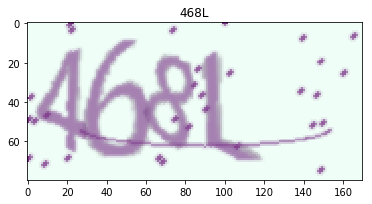

In [23]:
def decode(y):
    y = np.argmax(np.array(y), axis=2)[:,0]
    return ''.join([characters[x] for x in y])

def pred_decode(pred):
    y = pred.squeeze()
    return ''.join([characters[x] for x in y])

import matplotlib.pyplot as plt
%matplotlib inline
g = gen(1)
X, y = g.__next__()
plt.imshow(X[0])
plt.title(decode(y))

pred = model.predict(np.asarray([X[0]]))
ArgPred = np.argmax(pred, axis=2).T 
pred_str = pred_decode(ArgPred)
print("The prediction result is: " + pred_str) #任意显示一张验证的结果